In [1]:
import pandas as pd                                                  #for analysis of data
import numpy as np                                                   #for linear algebra
import matplotlib.pyplot as plt                                     #for data visualization 
import seaborn as sns                                                #for data visualization 
%matplotlib inline
from sklearn.model_selection import train_test_split                 #for evaluation
import warnings                                                      #for ignoring warnings
warnings.filterwarnings('ignore')

In [2]:
auto = pd.read_csv("Automobile price data _Raw_.csv",na_values='?')

# For additional values to be recognized, we use 'na_values'.
# As in our dataset '?' is the string to be recognized we include na_values='?'

In [3]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
auto.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
204,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


In [5]:
auto.shape
#dimension of thr dataset

(205, 26)

In [6]:
auto.info()
#information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [7]:
auto.describe()
#describing data

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
#Data cleaning

In [9]:
auto.isnull()
#checking missing values i.e columns containing '?'

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
 auto.isnull().sum()
#checking the count of missing values w.r.t ccolumns

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [11]:
auto['normalized-losses'].fillna(auto['normalized-losses'].mean(),inplace=True)

In [12]:
auto.interpolate(inplace=True)

In [13]:
auto.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [14]:
auto['num-of-doors'].value_counts()
#getting count of unique values

four    114
two      89
Name: num-of-doors, dtype: int64

In [15]:
auto['num-of-doors'].fillna('four',inplace = True)

In [16]:
replace_value= {'num-of-doors' : {'two' : 2, 'four' : 4},
     'num-of-cylinders' : {'two' : 2, 'three' : 3, 'four' : 4, 'five' : 5, 'six' : 6, 'eight' : 8, 'twelve' : 12}}
auto.replace(replace_value, inplace = True)

In [17]:
auto['num-of-doors'].value_counts()
#Checking whether the values has been replaced

4    116
2     89
Name: num-of-doors, dtype: int64

In [18]:
auto['num-of-cylinders'].value_counts()

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: num-of-cylinders, dtype: int64

In [19]:
make_mean_price = auto.groupby('make')['price'].mean()/100000
auto['make'] = auto['make'].map(make_mean_price)
#dividing by 100000 for much smaller values

In [20]:
auto['make']

0      0.154983
1      0.154983
2      0.154983
3      0.181868
4      0.181868
         ...   
200    0.180632
201    0.180632
202    0.180632
203    0.180632
204    0.180632
Name: make, Length: 205, dtype: float64

In [21]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    float64
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

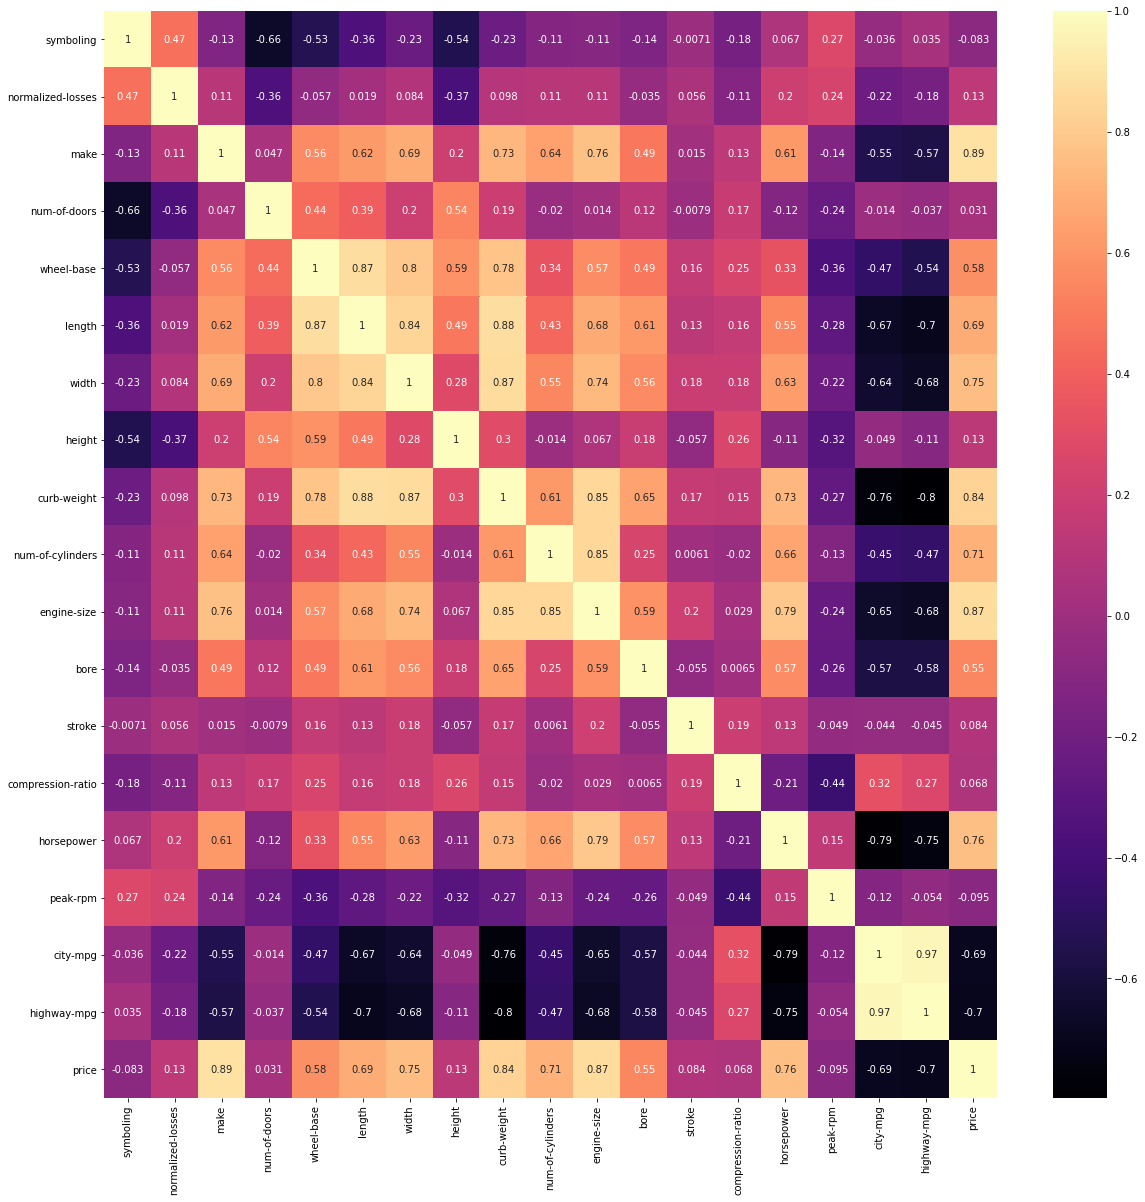

In [22]:
plt.figure(figsize = (20, 20))
sns.heatmap(auto.corr(), annot = True,cmap = 'magma')
plt.show()

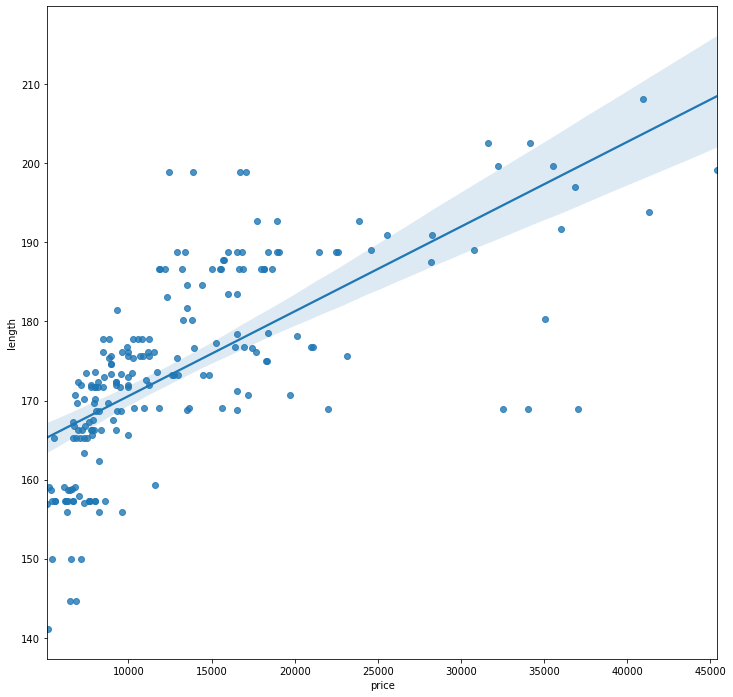

In [23]:
plt.figure(figsize = (12, 12))
sns.regplot(x=auto["price"], y=auto["length"])
plt.show()

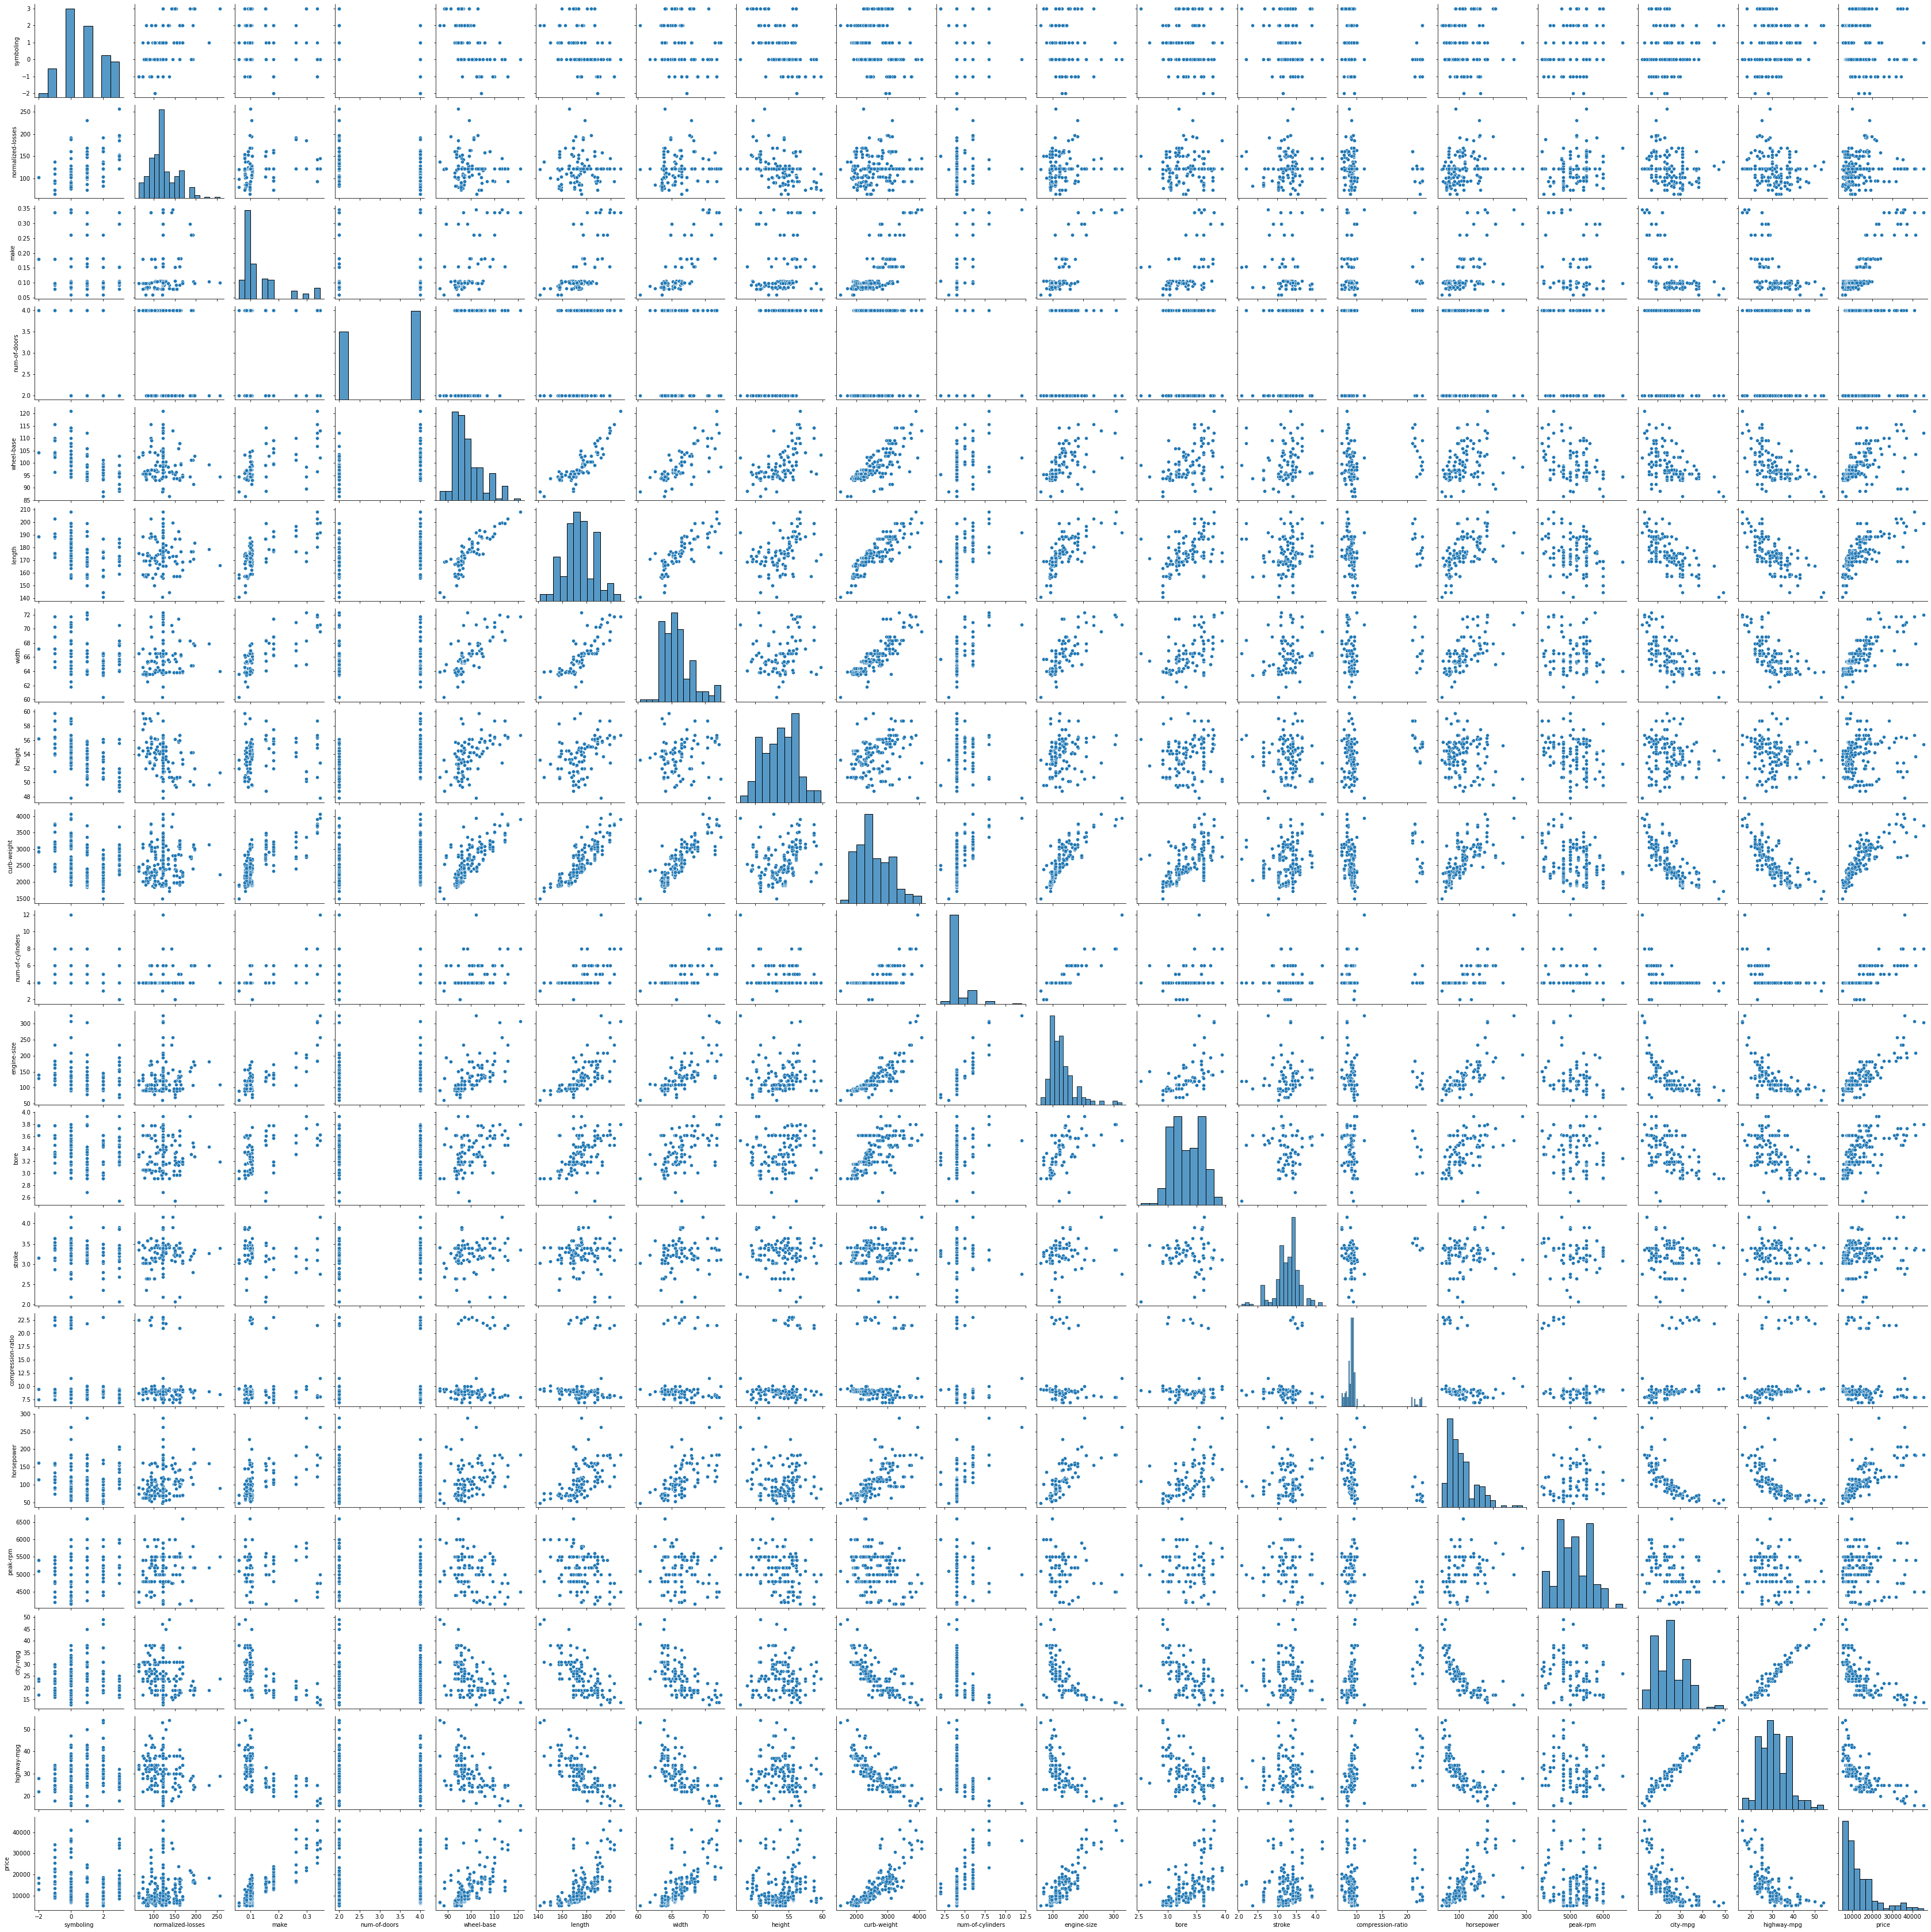

In [24]:
sns.pairplot(auto)

<AxesSubplot:xlabel='fuel-type', ylabel='horsepower'>

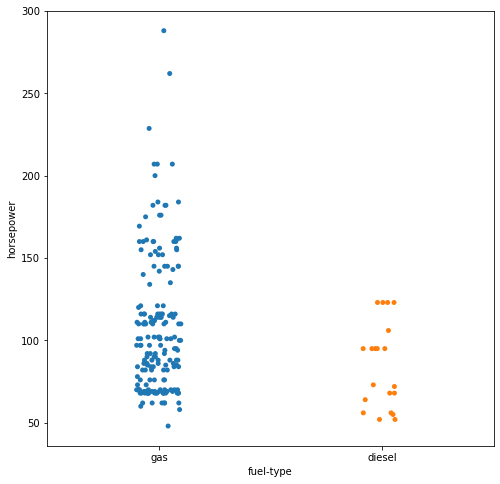

In [25]:
plt.figure(figsize = (8, 8))
sns.stripplot(x="fuel-type", y="horsepower", data=auto)

<AxesSubplot:xlabel='engine-type', ylabel='count'>

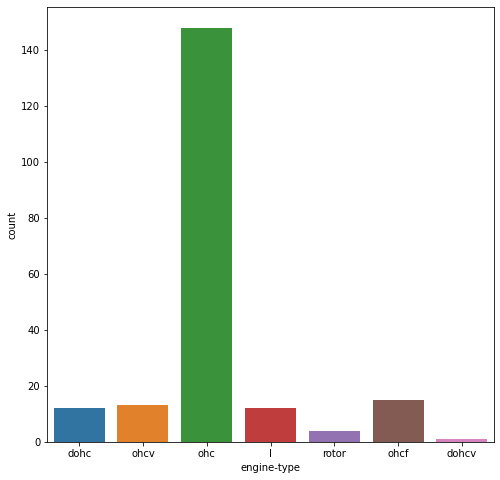

In [27]:
plt.figure(figsize = (8, 8))
sns.countplot(x="engine-type", data=auto)

<Figure size 576x576 with 0 Axes>

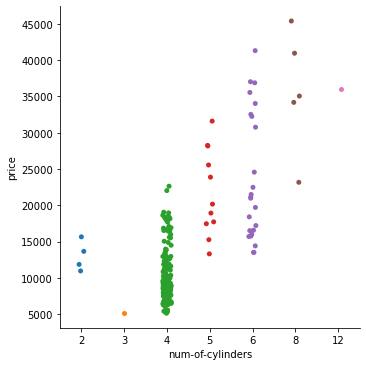

In [30]:
plt.figure(figsize = (8, 8))
sns.catplot(x="num-of-cylinders", y="price", data=auto)

<AxesSubplot:xlabel='engine-size', ylabel='Density'>

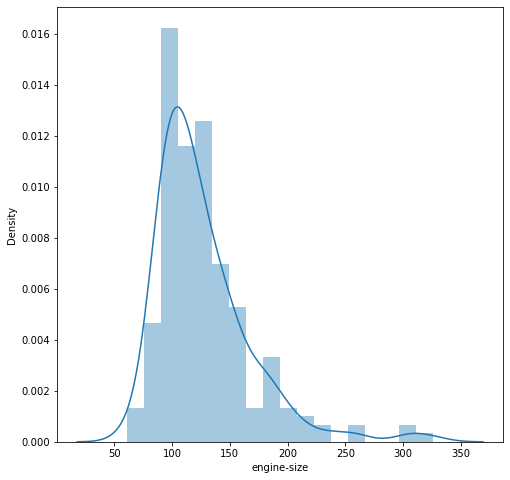

In [31]:
plt.figure(figsize = (8, 8))
sns.distplot(auto["engine-size"])

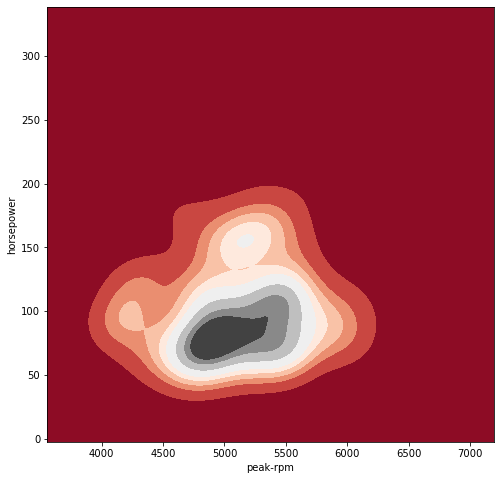

In [33]:
plt.figure(figsize = (8, 8))
sns.kdeplot(auto["peak-rpm"], auto["horsepower"], cmap='RdGy', shade=True, shade_lowest=True, )
plt.show()

<AxesSubplot:xlabel='highway-mpg', ylabel='city-mpg'>

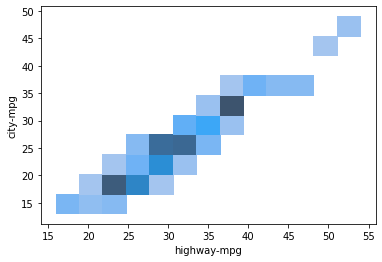

In [34]:
sns.histplot(data=auto,x='highway-mpg',y='city-mpg')

<AxesSubplot:xlabel='price', ylabel='engine-location'>

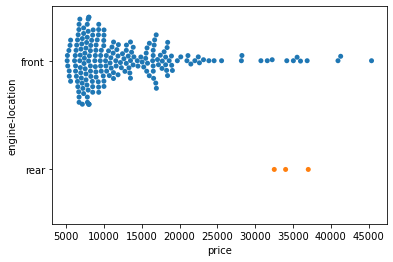

In [35]:
sns.swarmplot(x="price", y="engine-location", data=auto, palette='tab10')

<AxesSubplot:xlabel='price', ylabel='curb-weight'>

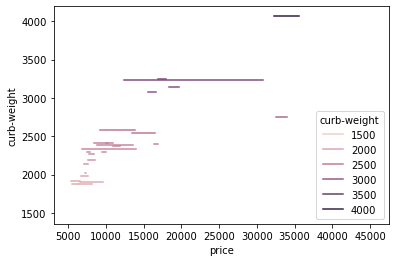

In [36]:
sns.lineplot(x="price", y="curb-weight",
             hue="curb-weight",
             data=auto)

In [37]:
mod_data=auto.drop('engine-location',axis = 1)

In [38]:
#checking if the column dropped
mod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    float64
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   wheel-base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb-weight        205 non-null    int64  
 13  engine-type        205 non-null    object 
 14  num-of-cylinders   205 non-null    int64  
 15  engine-size        205 non-null    int64  
 16  fuel-system        205 non

In [39]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,0.154983,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,0.154983,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,0.154983,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,0.181868,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,0.181868,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [40]:
mod_data=pd.get_dummies(mod_data)
#using get_dummies to convert categorical values containing columns to indicatory values


In [41]:
mod_data.head()

,symboling,normalized-losses,make,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122.0,0.154983,2,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,0,0,0,1,0,0
1,3,122.0,0.154983,2,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,0,0,0,1,0,0
2,1,122.0,0.154983,2,94.5,171.2,65.5,52.4,2823,6,...,1,0,0,0,0,0,0,1,0,0
3,2,164.0,0.181868,4,99.8,176.6,66.2,54.3,2337,4,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,0.181868,4,99.4,176.6,66.4,54.3,2824,5,...,0,0,0,0,0,0,0,1,0,0


As observed above, we can notice that columns which contained categorical values has been split into individual indicatory values

In [42]:
mod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    float64
 2   make                    205 non-null    float64
 3   num-of-doors            205 non-null    int64  
 4   wheel-base              205 non-null    float64
 5   length                  205 non-null    float64
 6   width                   205 non-null    float64
 7   height                  205 non-null    float64
 8   curb-weight             205 non-null    int64  
 9   num-of-cylinders        205 non-null    int64  
 10  engine-size             205 non-null    int64  
 11  bore                    205 non-null    float64
 12  stroke                  205 non-null    float64
 13  compression-ratio       205 non-null    float64
 14  horsepower              205 non-null    fl

Every data is of numerical type.
So all those columns which were of object type has been converted.

In [43]:
#splitting data into train set and test set
X = mod_data.drop('price', axis = 1)       #input
y = mod_data['price']                      #output
#since we have to predict the price,it cannot be included in the input.
#Hence dropped 

In [50]:
#splitting data with size 30% in essence 70% train data and remaining 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,shuffle=True)

Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression   #importing LineraRegression
from sklearn.metrics import r2_score                #R-2 score

Training model

In [70]:
model = LinearRegression()                          #Creating instance
model.fit(X_train, y_train)                         #fitting train data
prediction = model.predict(X_test)                  #predicting

In [71]:
#calculaing R-2 score
r2 = r2_score(y_test, prediction)
print(round(r2,4))

0.9086



we got an accuracy of 90%

In [54]:
print('Coefficients: \n', model.coef_)

Coefficients: 
 [ 1.67002889e+02 -9.34679499e-01  4.12187607e+04  6.56582153e+01
  1.24459199e+02 -8.73136172e+00  1.44559346e+02  1.44456636e+02
  2.10885969e+00  1.22663710e+02  1.09184705e+02 -4.21754335e+03
 -1.67727947e+03 -1.61731009e+03  1.76492872e+01  2.32471400e+00
  9.10448191e+01  1.07133462e+02  6.49030422e+03 -6.49030422e+03
 -9.09393462e+02  9.09393462e+02  3.62930656e+03 -1.44246855e+02
 -9.67499799e+02 -3.96789958e+02 -2.12076995e+03  8.45778081e+02
 -7.11690770e+02 -1.34087311e+02 -9.71278706e+02  3.63797881e-12
 -2.14535658e+03  3.85669042e+02  2.21875209e+03 -2.98552269e+03
  3.49773685e+03 -1.41896369e+03 -1.11221601e+03  3.49773685e+03
  6.49030422e+03 -3.27978993e+03 -7.71181462e+02 -3.40588998e+03
  0.00000000e+00]


Testing the model

<AxesSubplot:xlabel='price'>

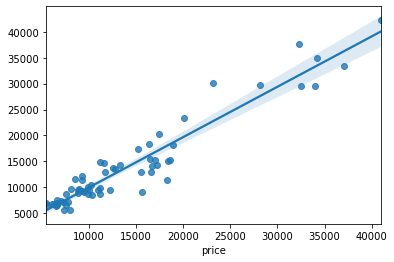

In [55]:
sns.regplot(x=y_test,y=prediction)

The best fit line is precised.

RANDOM FOREST

In [56]:
from sklearn.ensemble import RandomForestRegressor   
from sklearn.metrics import r2_score                   

In [57]:
model_3 = RandomForestRegressor()              
model_3.fit(X_train, y_train)                    
prediction_3 = model_3.predict(X_test)           
r2 = r2_score(y_test, prediction_3)
print(round(r2,4))

0.9284


we got an accuracy of 93%

<AxesSubplot:xlabel='price'>

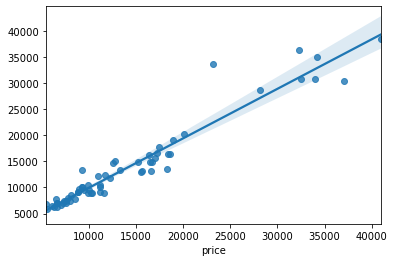

In [58]:
sns.regplot(x=y_test,y=prediction_3)

ADA BOOST REGRESSION

In [59]:
from sklearn.ensemble import AdaBoostRegressor

In [60]:
model_4=AdaBoostRegressor()
model_4.fit(X_train,y_train)

AdaBoostRegressor()

In [61]:
prediction=model_4.predict(X_test)

In [62]:
e=r2_score(y_test,prediction)

In [63]:
print(round(e,4))

0.9216


we got an accuracy of 92%

<AxesSubplot:xlabel='price'>

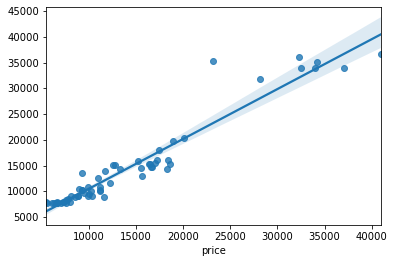

In [64]:
sns.regplot(x=y_test,y=prediction)

EXTRATREE (REGRESSION VER)

In [65]:
from sklearn.tree import ExtraTreeRegressor 
from sklearn.metrics import r2_score  
model_5 = ExtraTreeRegressor()                 
model_5.fit(X_train, y_train)                    
prediction = model_5.predict(X_test) 

In [66]:
r2 = r2_score(y_test, prediction)
print(round(r2,4))

0.834


we got an accuracy of 83%

<AxesSubplot:xlabel='price'>

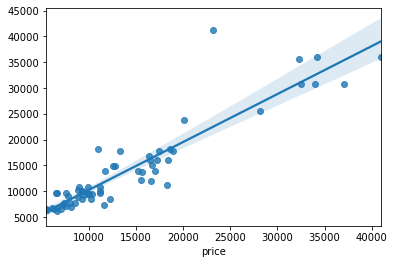

In [67]:
sns.regplot(x=y_test,y=prediction)

As we got highest R-2 score in RandomForest regression version algorithm, we plot distplot for observations.

<AxesSubplot:xlabel='price', ylabel='Density'>

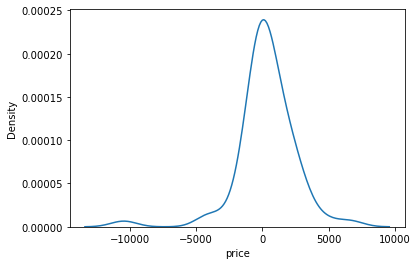

In [68]:
residual = y_test - prediction_3
sns.distplot(residual,hist=False)

DECISION TREE

In [72]:
from sklearn.tree import DecisionTreeRegressor 

In [73]:
model_6=DecisionTreeRegressor()
model_6.fit(X_train,y_train)
prediction=model_6.predict(X_test)

In [74]:
b=r2_score(y_test,prediction)
print(round(b,4))

0.7651


we got an accuracy of 76%